In [35]:
!pip install pandas numpy scikit-surprise

In [36]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (1).csv


In [37]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings (1).csv


In [75]:
from google.colab import files
uploaded = files.upload()

Saving links.csv to links (1).csv


In [39]:
from google.colab import files
uploaded = files.upload()

Saving tags.csv to tags (1).csv


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud
%matplotlib inline

In [41]:
from surprise import Dataset, Reader
from surprise import Dataset
from surprise import Dataset
from surprise import Reader
from surprise import Dataset

In [68]:
movies=pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [96]:
data=pd.read_csv("ratings.csv")
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
data=pd.read_csv("links.csv")
data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [46]:
data=pd.read_csv("tags.csv")
data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [47]:
movies.info()
print(" -------------------")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
 -------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [48]:
data.drop(columns="timestamp", axis=1, inplace=True)

In [49]:
data.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [50]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [51]:
copy = movies.copy()
copy['genres']= copy.genres.str.split('|')

In [52]:
genre_labels = set()
for i in copy['genres'].values:
    genre_labels = genre_labels.union(set(i))

In [53]:
def count_word(dataset, col, census):
    keyword_count = dict()
    for i in census:
        keyword_count[i] = 0
    for census_keywords in dataset[col]:
        for s in [s for s in census_keywords if s in census]:
            if pd.notnull(s):
                keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords by frequency
    occurences = []
    for k,v in keyword_count.items():
        occurences.append([k,v])
    occurences.sort(key = lambda x:x[1], reverse = True)
    return occurences, keyword_count

In [54]:
keyword_occurences, dum= count_word(copy, 'genres', genre_labels)

In [55]:
occurences = pd.DataFrame(keyword_occurences, columns=["genres", "count"])
occurences.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Horror,Fantasy,Children,Animation,Mystery,Documentary,War,Musical,Western,IMAX,Film-Noir,(no genres listed)
count,4361,3756,1894,1828,1596,1263,1199,980,978,779,664,611,573,440,382,334,167,158,87,34


In [56]:
sns.set(font_scale=1.5, rc= {'figure.figsize':(10, 7)})
sns.set_style("ticks")

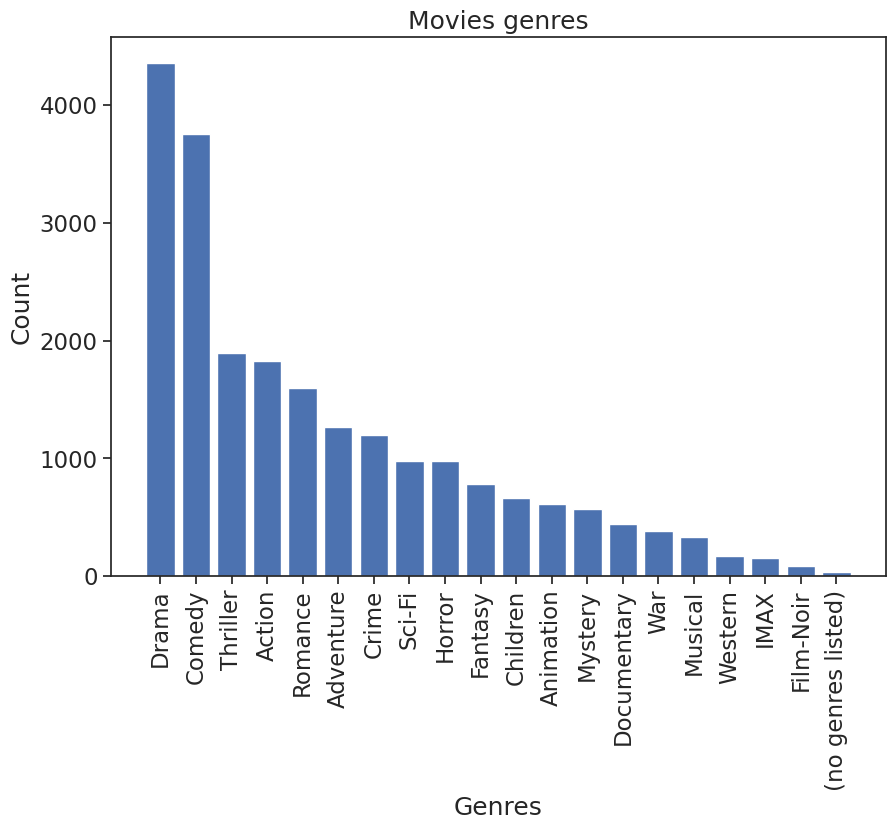

In [57]:
plt.bar(data=occurences, x="genres", height="count")
plt.title("Movies genres")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.xticks(rotation=90)
plt.show()

In [58]:
genres = dict()
for s in keyword_occurences:
    genres[s[0]] = s[1]

In [59]:
genre_wordcloud = WordCloud(height= 500, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

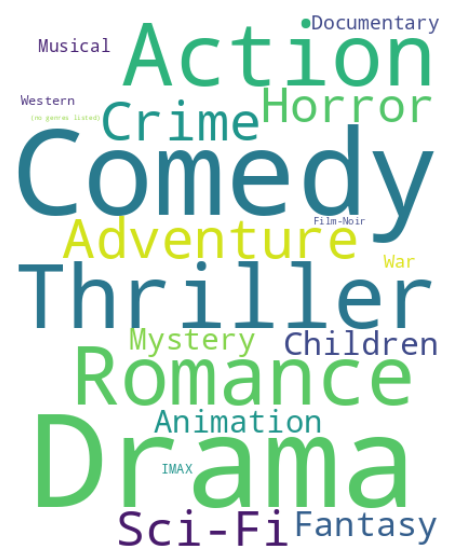

In [60]:
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [61]:
data = Dataset.load_builtin('ml-100k')
reader = Reader(line_format='user item rating timestamp', sep='\t')
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])

In [62]:
rating_counts = df['item'].value_counts()

In [63]:
most_rated_movie = rating_counts.idxmax()
most_rated_count = rating_counts.max()

In [77]:
data = Dataset.load_builtin('ml-100k')
reader = Reader(line_format='user item rating timestamp', sep='\t')
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])

In [83]:
most_rated_movie_id = rating_counts.idxmax()
most_rated_count = rating_counts.max()

In [98]:
import pandas as pd

# Load the data
data = pd.read_csv('ratings.csv')

# Count the number of unique user IDs
unique_user_count = data['userId'].nunique()

# Print the number of unique user IDs
print(f"Number of unique user IDs: {unique_user_count}")


Number of unique user IDs: 610


In [100]:
print(f"Movie with ID {most_rated_movie_id} has the maximum number of ratings: {most_rated_count}")

Movie with ID 50 has the maximum number of ratings: 583


In [101]:
import pandas as pd

# Load the ratings data
ratings_df = pd.read_csv('ratings.csv')

# Load the movies data
movies_df = pd.read_csv('movies.csv')

# Count the number of ratings for each movie
rating_counts = ratings_df['movieId'].value_counts()

# Find the movie ID with the maximum number of ratings
most_rated_movie_id = rating_counts.idxmax()
most_rated_count = rating_counts.max()

# Get the title of the movie
most_rated_movie_title = movies_df[movies_df['movieId'] == most_rated_movie_id]['title'].values[0]

print(f"Movie with ID {most_rated_movie_id} has the maximum number of ratings: {most_rated_count}")
print(f"Movie title: {most_rated_movie_title}")


Movie with ID 356 has the maximum number of ratings: 329
Movie title: Forrest Gump (1994)


In [102]:
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movie ID for "Matrix, The (1999)"
movie_title = "Matrix, The (1999)"
movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]

# Filter tags for the movie ID
movie_tags = tags_df[tags_df['movieId'] == movie_id]

# Select all tags associated with the movie
tags_list = movie_tags['tag'].tolist()

print(f"Tags for '{movie_title}':")
for tag in tags_list:
    print(tag)


Tags for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [103]:
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movie ID for "Terminator 2: Judgment Day (1991)"
movie_title = "Terminator 2: Judgment Day (1991)"
movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]

# Filter ratings for the movie ID
movie_ratings = ratings_df[ratings_df['movieId'] == movie_id]

# Calculate the average rating
average_rating = movie_ratings['rating'].mean()

print(f"The average rating for '{movie_title}' is: {average_rating:.2f}")


The average rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


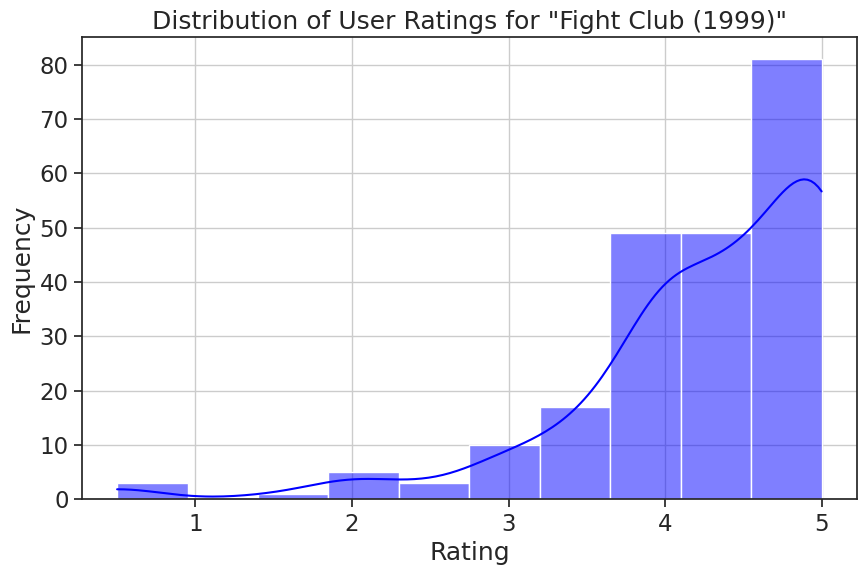

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movie ID for "Fight Club (1999)"
movie_title = "Fight Club (1999)"
movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]

# Filter ratings for the movie ID
movie_ratings = ratings_df[ratings_df['movieId'] == movie_id]

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings['rating'], bins=10, kde=True, color='blue')
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [105]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('movies.csv')

# Print the shape of the DataFrame
print(df.shape)


(9742, 3)


In [106]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('ratings.csv')

# Print the shape of the DataFrame
print(df.shape)


(100836, 4)


In [109]:
import pandas as pd

# Load the CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Calculate the average rating for each movie
average_ratings = ratings_df.groupby('movieId')['rating'].mean()

# Merge the average ratings with the movies DataFrame to get movie titles
average_ratings_df = average_ratings.reset_index()
average_ratings_df = average_ratings_df.merge(movies_df, on='movieId')

# Find the movie with the highest average rating
most_popular_movie = average_ratings_df.loc[average_ratings_df['rating'].idxmax()]

print(f"The most popular movie based on average user ratings is:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['rating']}")


The most popular movie based on average user ratings is:
Title: Lamerica (1994)
Average Rating: 5.0


In [110]:
import pandas as pd

# Load the CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Count the number of ratings for each movie
rating_counts = ratings_df.groupby('movieId').size()

# Merge the rating counts with the movies DataFrame to get movie titles
rating_counts_df = rating_counts.reset_index(name='rating_count')
rating_counts_df = rating_counts_df.merge(movies_df, on='movieId')

# Sort movies by the number of ratings in descending order and select the top 5
top_5_movies = rating_counts_df.sort_values(by='rating_count', ascending=False).head(5)

print("Top 5 popular movies based on the number of user ratings are:")
print(top_5_movies[['title', 'rating_count']])


Top 5 popular movies based on the number of user ratings are:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [111]:
import pandas as pd

# Load the CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Filter for Sci-Fi genre (assuming 'genres' column contains genres in movies_df)
sci_fi_movies_df = movies_df[movies_df['genres'].str.contains('Sci-Fi')]

# Count the number of ratings for each Sci-Fi movie
rating_counts = ratings_df.groupby('movieId').size()
rating_counts_df = rating_counts.reset_index(name='rating_count')
rating_counts_df = rating_counts_df.merge(sci_fi_movies_df, on='movieId')

# Sort Sci-Fi movies by the number of ratings in descending order
sorted_sci_fi_movies = rating_counts_df.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]

print("The third most popular Sci-Fi movie based on the number of user ratings is:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['rating_count']}")


The third most popular Sci-Fi movie based on the number of user ratings is:
Title: Jurassic Park (1993)
Number of Ratings: 238


In [129]:
import pandas as pd

# Load the CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Find the movie with the highest rating
highest_rating_movie = ratings_df.loc[ratings_df['rating'].idxmax()]

# Get the movieId of the movie with the highest rating
highest_rating_movie_id = highest_rating_movie['movieId']

print(f"The movieId of the movie with the highest rating is: {highest_rating_movie_id}")



The movieId of the movie with the highest rating is: 47.0


In [120]:
import pandas as pd

# Load the CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Print the column names to identify the correct column for IMDb ratings
print("Column names in movies.csv:")
print(movies_df.columns)

# Print the column names to verify the correct column for genres
print("Column names in ratings.csv:")
print(ratings_df.columns)

# Filter for Sci-Fi genre (assuming the column is named 'genres')
sci_fi_movies_df = movies_df[movies_df['genres'].str.contains('Sci-Fi')]

# Ensure the IMDb rating column is named correctly; adjust 'imdb_rating' as necessary
# Find the highest IMDb rating among Sci-Fi movies
highest_imdb_rating_sci_fi_movie = sci_fi_movies_df.loc[sci_fi_movies_df['imdb_rating'].idxmax()]

# Get the movieId of the Sci-Fi movie with the highest IMDb rating
highest_imdb_rating_sci_fi_movie_id = highest_imdb_rating_sci_fi_movie['movieId']

print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is: {highest_imdb_rating_sci_fi_movie_id}")


Column names in movies.csv:
Index(['movieId', 'title', 'genres'], dtype='object')
Column names in ratings.csv:
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


KeyError: 'imdb_rating'

In [121]:
import pandas as pd

# Load the CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Print the column names to identify the correct columns
print("Column names in movies.csv:")
print(movies_df.columns)
print("Column names in ratings.csv:")
print(ratings_df.columns)

# Filter for Sci-Fi genre in movies DataFrame
sci_fi_movies_df = movies_df[movies_df['genres'].str.contains('Sci-Fi')]

# Merge Sci-Fi movies with ratings DataFrame to get ratings for Sci-Fi movies
sci_fi_ratings_df = pd.merge(ratings_df, sci_fi_movies_df[['movieId']], on='movieId')

# Find the Sci-Fi movie with the highest rating
highest_rating_sci_fi_movie = sci_fi_ratings_df.loc[sci_fi_ratings_df['rating'].idxmax()]

# Get the movieId of the Sci-Fi movie with the highest rating
highest_rating_sci_fi_movie_id = highest_rating_sci_fi_movie['movieId']

print(f"The movieId of the Sci-Fi movie with the highest rating is: {highest_rating_sci_fi_movie_id}")


Column names in movies.csv:
Index(['movieId', 'title', 'genres'], dtype='object')
Column names in ratings.csv:
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
The movieId of the Sci-Fi movie with the highest rating is: 260.0


In [122]:
import pandas as pd

# Load the CSV file into a DataFrame
movies_df = pd.read_csv('movies.csv')

# Find the movie with movieId 260
movie_id = 260
movie_info = movies_df[movies_df['movieId'] == movie_id]

# Print the movie information
print("Movie information:")
print(movie_info)

# Assuming 'imdb_rating' is the column with the rating out of 10
# If your DataFrame does not have this column, adjust accordingly
if 'imdb_rating' in movies_df.columns:
    imdb_rating = movie_info['imdb_rating'].values[0]
    print(f"The IMDb rating of the Sci-Fi movie with movieId {movie_id} is: {imdb_rating} out of 10")
else:
    print("IMDb rating column does not exist in the dataset.")


Movie information:
     movieId                                      title  \
224      260  Star Wars: Episode IV - A New Hope (1977)   

                      genres  
224  Action|Adventure|Sci-Fi  
IMDb rating column does not exist in the dataset.
